In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
n_group = 1

In [3]:
x = np.arange(1, 11)
y = n_group + np.array([4.2, 6.1, 7.9, 10.2, 12.1, 13.8, 16.2, 18, 22, 21.5])

# Завдання А

In [4]:
num_group = 20 # 51
num_student = 10
n = int(num_group / 2)
N = 2**n 
T = 3000

In [5]:
N=3000 #3000, 100

s2 = 15*np.sin(2*np.pi*np.arange(N)/N)+30*np.cos(4*np.pi*np.arange(N)/N)

In [11]:
s2 = 2 * np.random.rand(N) + \
         num_group * np.cos(2 * num_student * np.pi * np.arange(N) / N)*(1+0.1*np.random.rand(N)) + \
         17 * np.cos(((4 * num_student * np.pi * np.arange(N))/N) + np.random.rand(N)) + \
         3 * np.cos((5 * num_student * np.pi * np.arange(N)) / N) * (np.random.rand(N)+num_group)

In [12]:
delta_t = 1 / (2 * T/N)

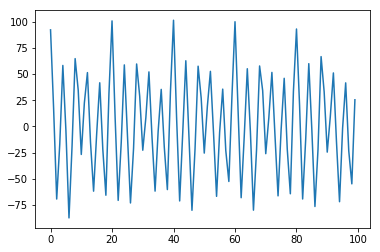

In [13]:
plt.plot(np.arange(N), s2);

In [14]:
va = 0.42 - 0.5 * np.cos(2 * np.pi * np.arange(len(s2))/N) + \
     0.08*np.cos(4 * np.pi * np.arange(len(s2)) / N)
vb = 0.54 - 0.46 * np.cos(2 * np.pi * np.arange(len(s2))/N)

In [15]:
def fourier_transform(s):
    A = np.array([(1 / N) * np.sum(s*np.cos(2*np.pi*0/N))])
    for l in range(1, int(N/2) - 1):
        A = np.append(A, (2 / N) * \
                      np.sum(s * np.cos(2 * np.pi * np.arange(N) * l / N)))
    A = np.append(A, (1 / N) * sum(s * np.cos(np.pi * np.arange(N))))
    B = np.array([])
    for l in range(int(N/2)):
        B = np.append(B, (2 / N) * \
                      np.sum(s * np.sin(2 * np.pi * np.arange(N) * l / N)))
    C = np.sqrt(A**2 + B**2)
    return A, B, C

In [16]:
a = np.array([])
b = np.array([])
c = np.array([])
for i in [1, va, vb]:
    s1 = s2 * i
    A, B, C = fourier_transform(s1)
    a = np.append(a, A)
    b = np.append(b, B)
    c = np.append(c, C)

In [17]:
a = a.reshape(3, -1)
b = b.reshape(3, -1)
c = c.reshape(3, -1)

In [19]:
def inv(A, B):
    d = []
    for i in range(N):
        d.append(np.sum(A * np.cos(2*np.pi*np.arange(int(N/2))*i/N)) + 
                 np.sum(B * np.sin(2*np.pi*np.arange(int(N/2))*i/N)))
    return d

In [20]:
d = np.array([])
for A, B in zip(a, b):
    d = np.append(d, inv(A, B))
d = d.reshape(3, -1)

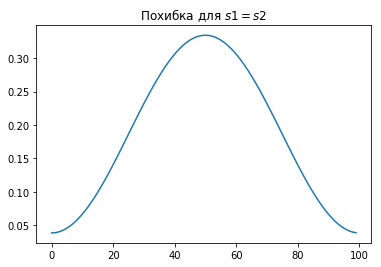

In [21]:
plt.plot(np.arange(len(s2)), abs(1*s2 - d[0]))
plt.title('Похибка для $s1 = s2$');

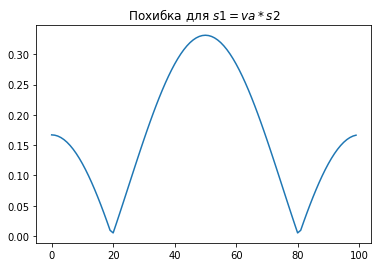

In [22]:
plt.plot(np.arange(len(s2)), abs(va*s2 - d[1]))
plt.title('Похибка для $s1 = va*s2$');

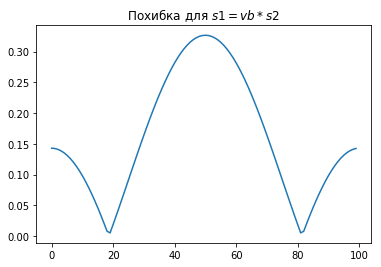

In [23]:
plt.plot(np.arange(len(s2)), abs(vb*s2 - d[2]))
plt.title('Похибка для $s1 = vb*s2$');

In [24]:
np.fft.fft(s2)

array([  1.12566982e+02 +0.00000000e+00j,
        -9.30223683e+00 +1.24720737e+01j,
        -2.57903409e+00 +5.63808464e+00j,
        -2.42422684e+01 -1.18271319e+01j,
        -2.84969091e+01 -3.14919763e+01j,
         6.90692414e-01 -1.84035992e+01j,
        -1.94431989e+01 +7.44054098e+00j,
         1.55572383e+01 +1.63648761e+01j,
         3.29806454e+01 +1.60694257e+01j,
         2.01610195e+00 +3.93877116e+01j,
         1.03697362e+03 +1.58083917e+00j,
         1.55504769e+00 +3.28418215e+01j,
         1.28843159e+01 -3.51793697e+01j,
        -2.70671922e+01 +1.84189477e+01j,
        -4.10366922e+01 -2.89771032e+01j,
         7.41776663e+00 +6.49438552e+00j,
         3.56949016e+00 -4.96292807e+01j,
        -2.46781912e+01 +1.88222394e+01j,
        -1.43272894e+01 +3.53045023e+00j,
         1.49240300e+00 -1.51228637e+01j,
         7.10081191e+02 +4.37634845e+02j,
         2.28718622e+01 -3.36849832e+01j,
        -4.11886730e+01 +2.23943988e+00j,
         4.32246317e+00 +1.1893586